In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_pc3 = pd.read_csv('csv_result-PC3.csv')
df_pc4 = pd.read_csv('csv_result-PC4.csv')
df_mc1 = pd.read_csv('csv_result-MC1.csv')

In [3]:
df = df_pc3.merge(df_pc4, how = 'outer')

D:\Michigan_Study_Folder\SIADS_591\SIADS_591_592-main\env\lib\site-packages\pandas\core\reshape\merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [4]:
df2 = df[['Defective','c']].fillna('')
df2["defects"] = df2["Defective"].astype('string') + df2["c"].astype('string')
df2 = df2.drop(labels = ['Defective', 'c'], axis = 1)

In [5]:
df['defects'] = df2
df= df.drop(labels = ['Defective', 'c'], axis = 1)

In [6]:
df['defects'] = df['defects'].astype('string')

In [7]:
df['defects'] = df['defects'].str.replace('False', '0')
df['defects'] = df['defects'].str.replace('True', '1')
df['defects'] = df['defects'].str.replace('N', '0')
df['defects'] = df['defects'].str.replace('Y', '1')

In [8]:
df['defects'] = df['defects'].astype('int64')

In [9]:
df = df.merge(df_mc1, how = 'outer')

In [10]:
df = df.merge(df_mc1, how = 'outer')
# maybe set nans to an empty string
df3 = df[['Defective','defects']].fillna('')
df3["defected"] = df3["Defective"].astype('string') + df3["defects"].astype('string')
df3 = df3.drop(labels = ['Defective', 'defects'], axis = 1)
df['defected'] = df3
df_f = df.drop(['defects','Defective'], axis = 1)
df_f['defected'] = df_f['defected'].astype('string')
df_f['defected'] = df_f['defected'].str.replace('False', '0')
df_f['defected'] = df_f['defected'].str.replace('True', '1')
df_f['defected'] = df_f['defected'].str.replace('N', '0')
df_f['defected'] = df_f['defected'].str.replace('Y', '1')
df_f['defected'] = df_f['defected'].astype('float')

In [11]:
df_f.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY,defected
0,1,16,13,1,6,11,20,7,0.24,8,...,68,81,31,21,57,42.50,29,NaN,NaN,0.0
1,2,2,7,0,0,7,10,4,0.29,4,...,9,22,5,8,24,33.33,14,NaN,NaN,1.0
2,3,1,13,5,0,0,22,7,0.37,10,...,38,53,19,19,21,0.00,19,NaN,NaN,0.0
3,4,8,3,1,0,1,4,2,0.14,2,...,32,38,19,13,24,6.67,14,NaN,NaN,0.0
4,5,1,5,2,1,1,6,3,0.15,2,...,27,33,19,14,23,9.52,20,NaN,NaN,0.0


In [12]:
df_f.columns

Index(['id', 'LOC_BLANK', 'BRANCH_COUNT', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT',
       'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY',
       'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY',
       'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT',
       'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE',
       'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY',
       'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH',
       'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME',
       'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT',
       'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT',
       'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES',
       'PERCENT_COMMENTS', 'LOC_TOTAL', 'GLOBAL_DATA_COMPLEXITY',
       'GLOBAL_DATA_DENSITY', 'defected'],
      dtype='object')

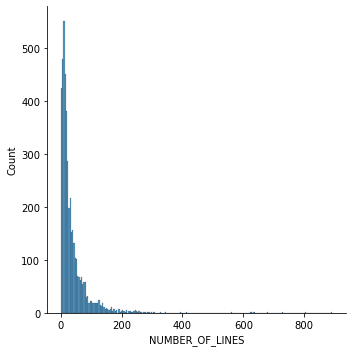

In [13]:
sns.displot(df_f['NUMBER_OF_LINES'])

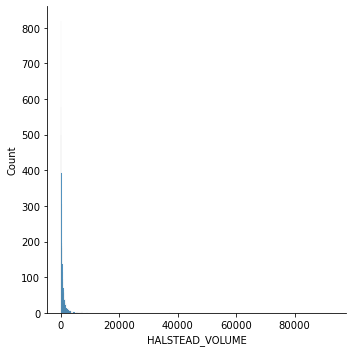

In [14]:
sns.displot(df_f['HALSTEAD_VOLUME'])

In [15]:
len(df_f[(df_f['HALSTEAD_VOLUME'] < 1000) & (df_f['HALSTEAD_VOLUME'] > 20)])

3489

In [16]:
df_f['HALSTEAD_EFFORT'].max()

31159817.68

In [17]:
464758/20

23237.9

In [18]:
# e = 464758.0 (b = e**(2/3)/3000)
# t = 25820 (e/18)

In [28]:
# Columns to Focus
# 1. Number Of Lines < 400
# 2. HALSTEAD_VOLUME(V) < 1000 & >20
# 3. CYCLOMATIC_COMPLEXITY < 15 (can be skipped)
# 4. bugs (HALSTEAD_ERROR_EST) < 2
# 5. HALSTEAD_EFFORT(e) < 464758.0 (based on b = e**(2/3)/3000)
# 6. HALSTEAD_PROG_TIME (t) < 25820 (based on t = e/18)
# 7. HALSTEAD_DIFFICULTY (d) < 23237.9 (based on e = v*d)

In [19]:
cor = df.corr(method = 'spearman')

<AxesSubplot:>

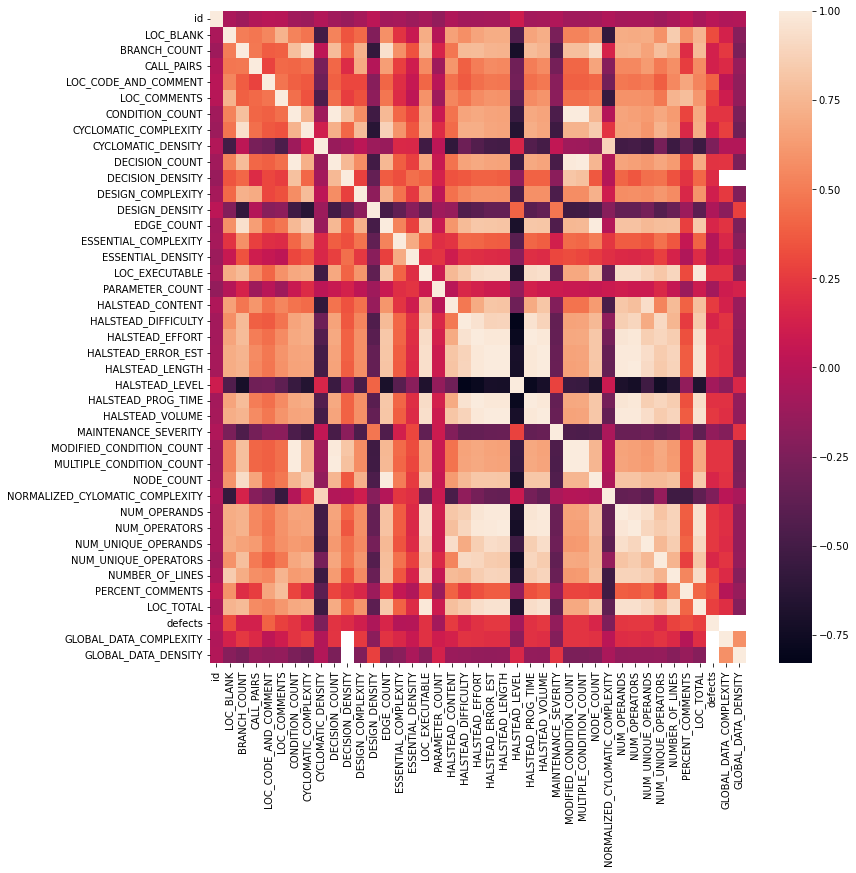

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(cor)

In [31]:
columns = ['id', 'DESIGN_COMPLEXITY', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 
          'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'NUM_OPERANDS',
          'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES', 'LOC_TOTAL', 'defected']

In [32]:
df_f.columns

Index(['id', 'LOC_BLANK', 'BRANCH_COUNT', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT',
       'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY',
       'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY',
       'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT',
       'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE',
       'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY',
       'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH',
       'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME',
       'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT',
       'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT',
       'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES',
       'PERCENT_COMMENTS', 'LOC_TOTAL', 'GLOBAL_DATA_COMPLEXITY',
       'GLOBAL_DATA_DENSITY', 'defected'],
      dtype='object')

In [33]:
df_col = df_f[columns]

In [34]:
cor = df_col.corr(method = 'spearman')

<AxesSubplot:>

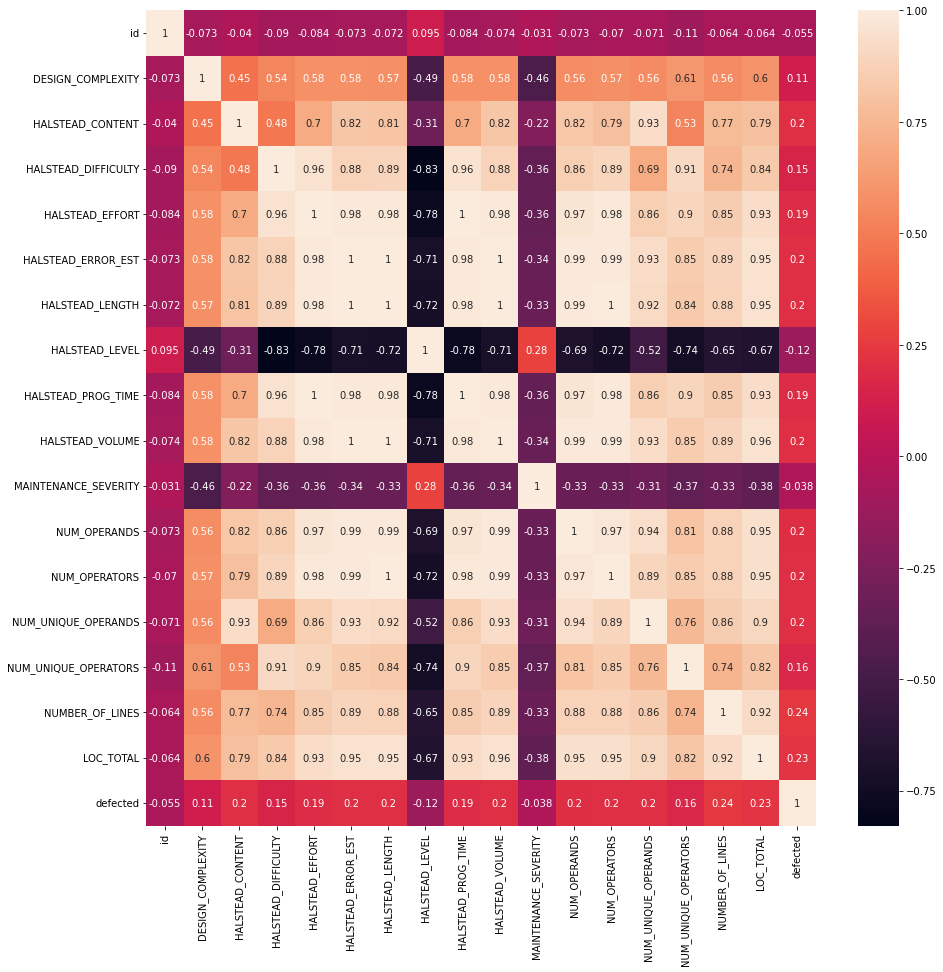

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)

<AxesSubplot:xlabel='HALSTEAD_VOLUME', ylabel='HALSTEAD_ERROR_EST'>

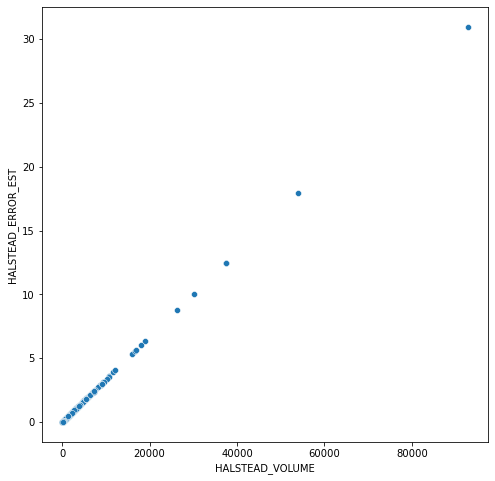

In [42]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='HALSTEAD_VOLUME', y='HALSTEAD_ERROR_EST', data=df_f)

In [50]:
# Columns to Focus
# 1. Number Of Lines < 400
# 2. HALSTEAD_VOLUME(V) < 1000 & >20
# 3. CYCLOMATIC_COMPLEXITY < 15 (can be skipped)
# 4. bugs (HALSTEAD_ERROR_EST) < 2
# 5. HALSTEAD_EFFORT(e) < 464758.0 (based on b = e**(2/3)/3000)
# 6. HALSTEAD_PROG_TIME (t) < 25820 (based on t = e/18)
# 7. HALSTEAD_DIFFICULTY (d) < 23237.9 (based on e = v*d)
columns_clean2 = ['LOC_TOTAL', 'HALSTEAD_VOLUME', 'CYCLOMATIC_COMPLEXITY', 'HALSTEAD_ERROR_EST', 'HALSTEAD_EFFORT', 
                  'HALSTEAD_PROG_TIME', 'HALSTEAD_DIFFICULTY', 'defected']

In [51]:
df_clean2 = df_f[columns_clean2].copy()

In [52]:
clean_condition = (df_clean2['LOC_TOTAL'] < 400) & (df_clean2['HALSTEAD_VOLUME'] < 1000) & (df_clean2['HALSTEAD_VOLUME'] > 20) & (df_clean2['CYCLOMATIC_COMPLEXITY'] < 15) & (df_clean2['HALSTEAD_ERROR_EST'] < 2) & (df_clean2['HALSTEAD_EFFORT'] < 464758.0) & (df_clean2['HALSTEAD_PROG_TIME'] < 25820) & (df_clean2['HALSTEAD_DIFFICULTY'] < 23237.9)

In [53]:
df_clean2['REDESIGN_STATUS'] = pd.DataFrame(clean_condition)

In [54]:
# 0 if no changes
# 1 is Redsign needed
df_clean2['REDESIGN_STATUS'] = [0 if evaluation == True else 1 for evaluation in df_clean2['REDESIGN_STATUS']]

In [55]:
df_clean2.head()

,LOC_TOTAL,HALSTEAD_VOLUME,CYCLOMATIC_COMPLEXITY,HALSTEAD_ERROR_EST,HALSTEAD_EFFORT,HALSTEAD_PROG_TIME,HALSTEAD_DIFFICULTY,defected,REDESIGN_STATUS
0,29,849.37,7,0.28,19562.81,1086.82,23.03,0.0,0
1,14,114.71,4,0.04,825.94,45.89,7.20,1.0,0
2,19,477.56,7,0.16,9073.67,504.09,19.00,0.0,0
3,14,350.00,2,0.12,3831.58,212.87,10.95,0.0,0
4,20,302.66,3,0.10,3010.71,167.26,9.95,0.0,0


In [56]:
df_clean2[['defected', 'REDESIGN_STATUS']]

,defected,REDESIGN_STATUS
0,0.0,0
1,1.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
4518,0.0,0
4519,0.0,1
4520,0.0,0
4521,0.0,1


In [57]:
df_clean2['defected'].value_counts()

0.0    4165
1.0     358
Name: defected, dtype: int64

In [58]:
df_clean2['REDESIGN_STATUS'].value_counts()

0    3475
1    1048
Name: REDESIGN_STATUS, dtype: int64

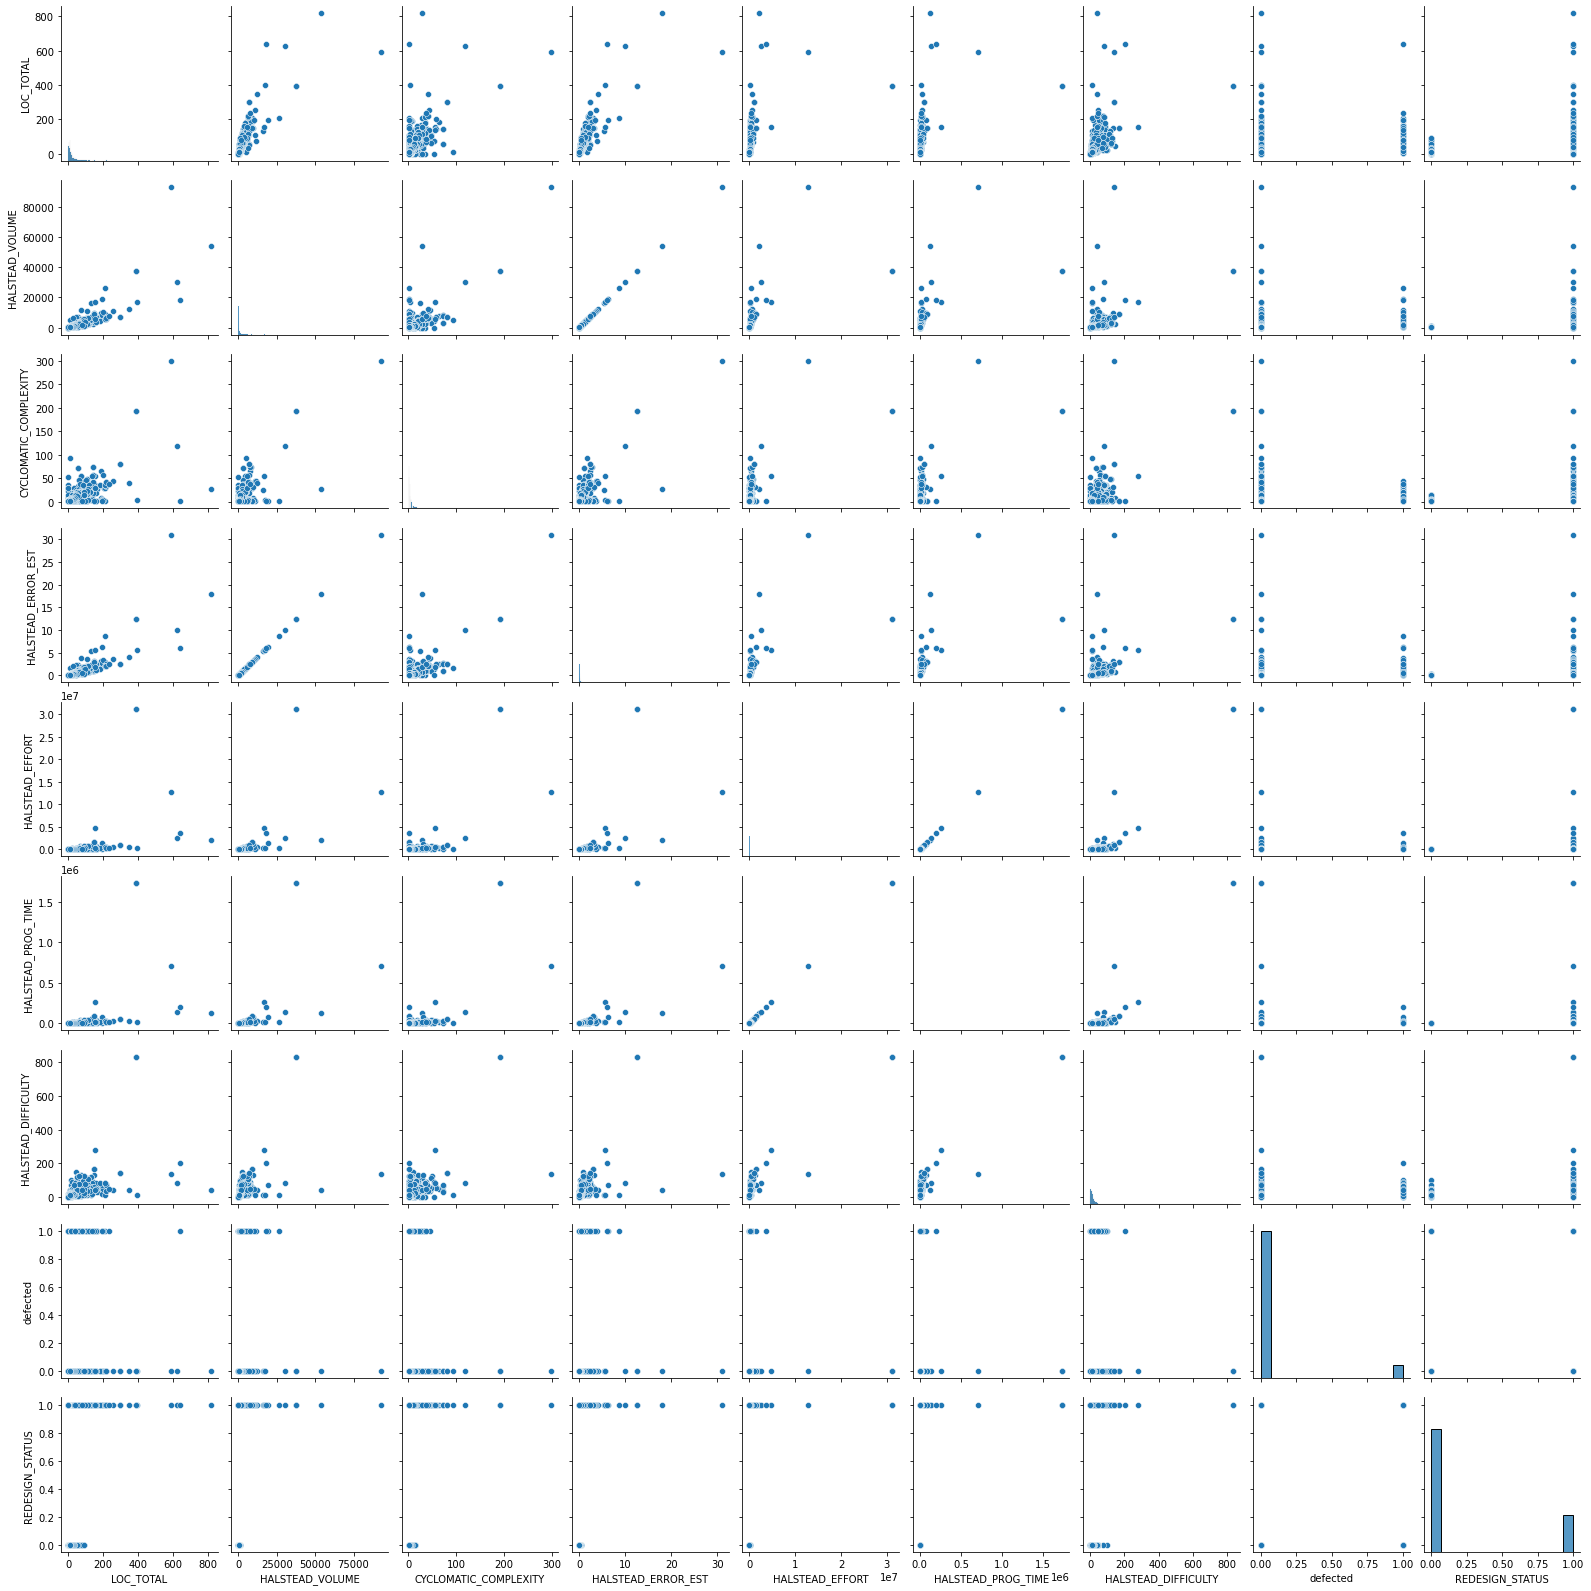

In [59]:
sns.pairplot(df_clean2)

<AxesSubplot:xlabel='REDESIGN_STATUS', ylabel='count'>

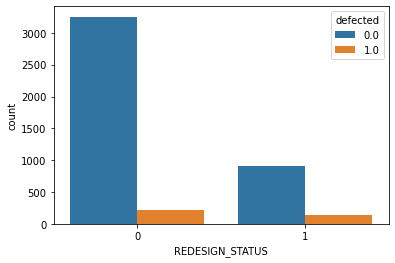

In [60]:
sns.countplot(data=df_clean2, x='REDESIGN_STATUS', hue='defected')

In [64]:
df_clean2[(df_clean2['REDESIGN_STATUS'] == 1) & (df_clean2['defected'] == 0)]

,LOC_TOTAL,HALSTEAD_VOLUME,CYCLOMATIC_COMPLEXITY,HALSTEAD_ERROR_EST,HALSTEAD_EFFORT,HALSTEAD_PROG_TIME,HALSTEAD_DIFFICULTY,defected,REDESIGN_STATUS
7,54,1075.10,9,0.36,20355.23,1130.85,18.93,0.0,1
13,30,1252.14,6,0.42,27977.56,1554.31,22.34,0.0,1
14,26,1300.85,18,0.43,45032.28,2501.79,34.62,0.0,1
15,186,7357.35,65,2.45,359267.30,19959.29,48.83,0.0,1
17,29,1002.39,6,0.33,25983.73,1443.54,25.92,0.0,1
...,...,...,...,...,...,...,...,...,...
4493,40,1105.82,9,0.37,16403.02,911.28,14.83,0.0,1
4495,2,11.61,1,0.00,17.41,0.97,1.50,0.0,1
4515,0,19.65,1,0.01,39.30,2.18,2.00,0.0,1
4519,0,0.00,1,0.00,0.00,0.00,0.00,0.0,1
